In [1]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt

import torch

from pipeline.interface import get_model

/home/uvll/anaconda3/envs/honey/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def construct_input_prompt(user_prompt):
    SYSTEM_MESSAGE = "The following is a conversation between a curious human and AI assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.\n"
    IMAGE_TOKEN = "Human: <image>\n" #<image> denotes an image placehold.
    USER_PROMPT = f"Human: {user_prompt}\n"

    return SYSTEM_MESSAGE + IMAGE_TOKEN + USER_PROMPT + "AI: "

In [ ]:
# Load trained model
ckpt_path = "checkpoints/13B-C-Abs-M576/last"
model, tokenizer, processor = get_model(ckpt_path, use_bf16=True)
model.cuda()
print("Model initialization is done.")

In [4]:
prompts = [construct_input_prompt("Explain why this meme is funny.")]
image_list = ["./examples/monday.jpg"]

In [5]:
images = [Image.open(_) for _ in image_list]
inputs = processor(text=prompts, images=images)
inputs = {k: v.bfloat16() if v.dtype == torch.float else v for k, v in inputs.items()}
inputs = {k: v.to(model.device) for k, v in inputs.items()}

In [6]:
# generate kwargs (the same in transformers) can be passed in the do_generate()
generate_kwargs = {
    'do_sample': True,
    'top_k': 5,
    'max_length': 512
}

In [7]:
with torch.no_grad():
    res = model.generate(**inputs, **generate_kwargs)
sentence = tokenizer.batch_decode(res, skip_special_tokens=True)

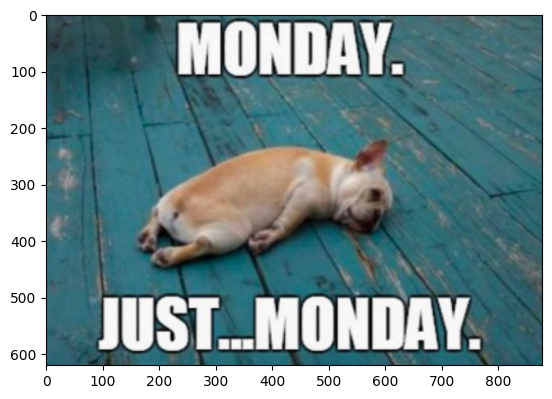

generated: This meme is funny because it uses an adorable French Bulldog puppy lying on a hardwood floor, combined with a humorous and relatable caption. The caption says "Monday. Justâ€¦Monday," which implies that even the cute puppy has to endure the challenges of the start of the workweek like everyone else. The meme taps into the shared experience of having a less-than-exciting day and adds a lighthearted, fun twist. The contrast between the innocent puppy and the caption makes it amusing and appealing to a wide audience.


In [8]:
# Show the inference result.
plt.imshow(images[0])
plt.show()
print(f"generated: {sentence[0]}")